### Generating Waveforms  
how to numerically obtain the gravitational waveform radiated during a compact binary coalescence, assuming the basic parameters of the binary are known.  
-  `PyCBC` library: which provides an easy-to-use Python interface to obtain such waveforms. 
- `PyCBC` can more generally be used to analyze or simulate gravitational-wave data, find or simulate astrophysical signals from compact binary mergers, and study their parameters.

In [3]:
from pycbc.waveform import get_td_waveform
import pylab
%matplotlib inline

generate the gravitational waveform using one of the available waveform approximants.  
The waveform can be generated as a time series using `get_td_waveform()`  
The key parameters are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to use. A variety of approximants are available that include different physical effects.

In [4]:
# The outputs of this function are the "plus" and "cross" polarizations 
# of the gravitational-wave signal as viewed from the line of sight at 
# a given source inclination (assumed face-on, i.e. zero inclination
# if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/16384,
                         f_lower=30)

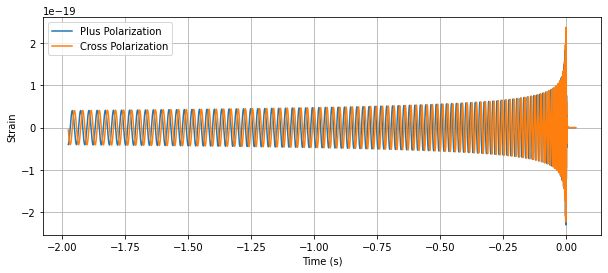

In [5]:
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

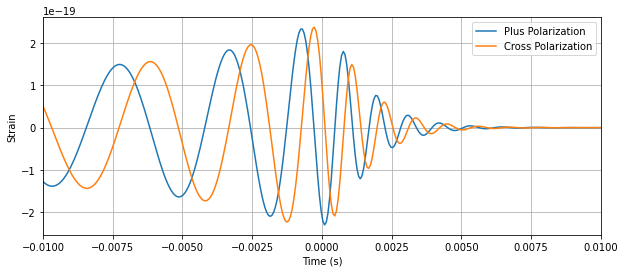

In [6]:
# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In the this case, the two polarizations differ only by the phase of the signal. This is a known property of the signal, when the orbital plane of the binary does not precess (i.e. the individual black holes spins are aligned with the orbital angular momentum).

### How does the waveform change with the mass of the binary?

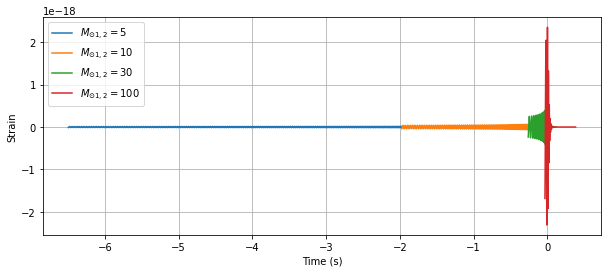

In [9]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
pylab.figure(figsize=pylab.figaspect(0.4))
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Changing the distance of the waveform

The luminosity distance of the source is also a parameter when you generate a waveform. The units used are Megaparsecs. Keep in mind that no redshift effects are taken into account here, so there is a simple linear relationship between distance and amplitude.

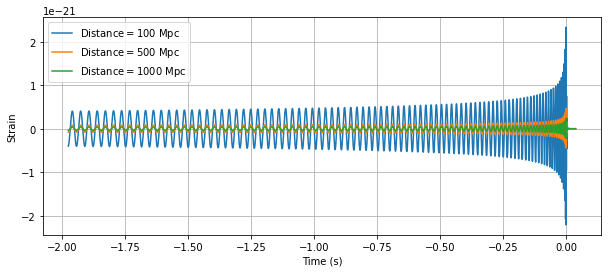

In [10]:
pylab.figure(figsize=pylab.figaspect(0.4))
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    pylab.plot(hp.sample_times, hp, label='Distance$=%s$ Mpc' % d)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

### Question

Make a waveform with the mass parameters of GW170817, and a low frequency cut-off (f_lower) of 40 Hz.  How long is the waveform?  (Hint: set delta_t to 1/16384 to increase the sample rate)

In [15]:
m1 = 1.46 # solar mass units
m2 = 1.27 # solar mass units
d = 40 # Megaparsec units
f_low = 40 # Hertz

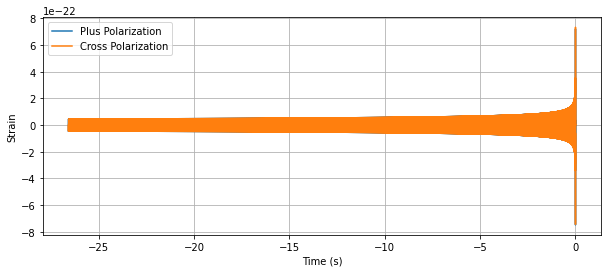

In [16]:
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt", mass1=m1, mass2=m2, distance=d, delta_t=1.0/16384, f_lower=f_low)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()